In [41]:
from IPython.display import Math, Audio
from scipy.io.wavfile import read
import numpy as np
from librosa import frames_to_time
from librosa.feature import zero_crossing_rate, mfcc
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['figure.figsize'] = (16,5)

# Feature extraction and analysis

### Feature types

Feature extraction is a technological method that attempts to find and rank the "amount" of some (musical) feature's presence in an audio signal. A feature is simply a statistic. Think of is as a "digital signature" for some musical factor. 

Features should be "informative". This means that we are looking for features that can characterize the behaviour of what we are trying to model. For instance, if we want to model the weather, features like temperature, humidity and wind are informative (they are related to the problem). By contrast, the result of a football game will not be an informative feature because it doesn't affect the weather.



* Onsets 
* Timing data (e.g., tempo)
* Loudness
* Zero-crossing rate
* Key/frequency data (e.g., chromagram)
* Spectral features (e.g., centroid - bright/dark?, rolloff, MFCCs, spectral spread, spectral envelope, flux)
* RMS (root mean square - loudness?)

We can compute the feature as an averaged value over an entire song, or, more typically, we might compute the feature just for a small window of audio. This is often referred to as an **instantaneous feature**

Commonly in music and signal analysis, we will calculate many "low level features". These are features that in and of themselves don't mean much in isolation, and often don't translate well (directly, at least) to some perceptual phenomenon. However, they often can be used to estimate higher-level (more musically or perceptually relevant) features.


## Features extracted from time domain

In general, the time-domain audio features are extracted directly from the time domain representation (samples) of the audio signal. Common time-domain features are the short-term energy
and short-term zero-crossing rate. 

Even though these are features that are calculated from the time domain, the resulting feature usually tells us something about the *spectral* content of the sound. So these are actually **spectral features**!

#### Short-term vs long-term features
Short-term or "instantaneous" features are those that are calculated on a frame-by-frame basis. "Mid term" features are usually calculations or statistics that come *from* the averaging or addition of short term statistics, and long-term (or "global") statistics are ones that describe the audio signal or file as a whole.

## Energy

The term 'energy' is used to represent “strength of the signal” or intensity. There are two common ways to measure the strength: **energy** and **root mean square energy**. 

Let $x_{i}(n)$ be the sequence of audio samples of the $i$th frame. The short-term **energy** is computed
according to the equation:

$$E(i) = \sum_{n} |x_{i}(n)|^2$$

Where $E(i)$ is the energy of a single frame, and the resulting vector, E, represents the energy of the signal.

#### Root Mean Square Energy (RMSE)

The root-mean-square energy (RMSE) is the more common intensity measure of a signal. It is defined as:

$$RMS(i) = \sqrt{ \frac{1}{WL} \sum_{n}^{WL} \left| x_i(n) \right|^2 } $$

the RMS of a signal is a really just a value used to calculate the average, or continuous, power of a signal. Typical block lengths for the RMS calculation are between 100-500ms. This 'window length' is sometimes referred to as the **integration time.**

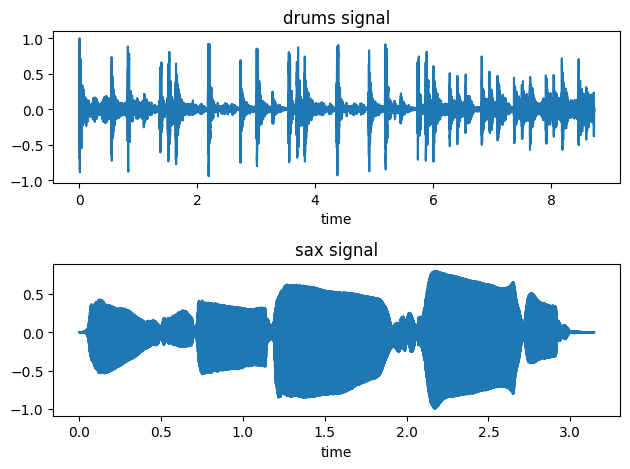

In [42]:
(fs, x) = read('../audio/80spopDrums.wav')
(fs2, x2) = read('../audio/sax-phrase-short.wav')
time = np.arange(0,x.size)/fs
time2 = np.arange(0,x2.size)/fs2
data = x/np.max(abs(x)) # normalize amplitudes to between -1 and 1
data2 = x2/np.max(abs(x2))
fig, ax = plt.subplots(2)
ax[0].plot(time,data)
ax[0].set_title('drums signal')
ax[0].set_xlabel('time')

ax[1].plot(time2,data2)
ax[1].set_title('sax signal')
ax[1].set_xlabel('time')
plt.tight_layout()

In [43]:
Audio(x,rate=44100)

In [44]:
Audio(x2, rate=fs2)

Using our formula, let's calculate the energy of our drum signal on a frame by frame basis:

In [45]:
#Energy:
hop_length = 2048
frame_length = 4096

energy = np.array([])
for i in range(0,len(data),hop_length): #iterate through data frame by frame, shifting by factor of hop_length
    e_i = sum(abs(data[i:i+frame_length]**2)) #sum across samples of each frame
    energy = np.append(energy,e_i)
    
energy.shape # shape should be number of frames long

(188,)

In [46]:
#And RMSE:

rmse = np.array([])
for i in range(0,len(data),hop_length): #iterate through data frame by frame, shifting by factor of hop_length
    #rms_i = np.sqrt(1/frame_length * sum(abs(data[i:i+frame_length]**2))) #sum across samples of each frame
    #note the above is the same as simply taking the mean since we are summing values and dividing by total:
    rms_i = np.sqrt(np.mean(abs(data[i:i+frame_length]**2)))
    rmse = np.append(rmse,rms_i)


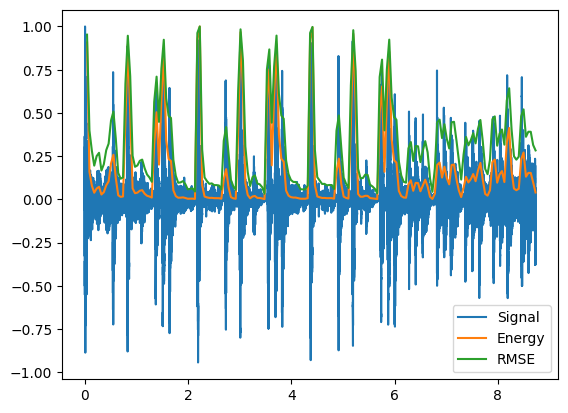

In [47]:
#plot signal wrt time underneath
plt.plot(time,data, label='Signal')

#convert frames to time with librosa
frames = range(1,len(energy)+1) #vector of frames as iterable
t = frames_to_time(frames, sr=fs, hop_length=hop_length)

plt.plot(t,energy/energy.max(),label='Energy') #normalize amplitudes
plt.plot(t,rmse/rmse.max(),label='RMSE')
plt.legend();

Compare to the sax signal:

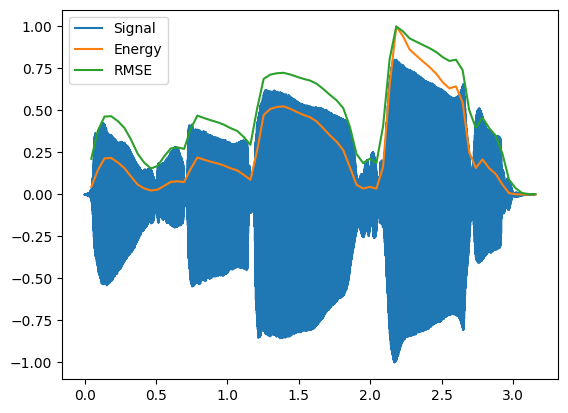

In [48]:
#Energy:
hop_length = 2048
frame_length = 4096

energy = np.array([])
for i in range(0,len(data2),hop_length): #iterate through data frame by frame, shifting by factor of hop_length
    e_i = sum(abs(data2[i:i+frame_length]**2)) #sum across samples of each frame
    energy = np.append(energy,e_i)
    
energy.shape # shape should be number of frames long

#And RMSE:
rmse = np.array([])
for i in range(0,len(data2),hop_length): #iterate through data frame by frame, shifting by factor of hop_length
    #rms_i = np.sqrt(1/frame_length * sum(abs(data[i:i+frame_length]**2))) #sum across samples of each frame
    #note the above is the same as simply taking the mean since we are summing values and dividing by total:
    rms_i = np.sqrt(np.mean(abs(data2[i:i+frame_length]**2)))
    rmse = np.append(rmse,rms_i)
    
#plot signal wrt time underneath
plt.plot(time2,data2, label='Signal')

#convert frames to time with librosa
frames = range(1,len(energy)+1) #vector of frames as iterable
t = frames_to_time(frames, sr=fs, hop_length=hop_length)

plt.plot(t,energy/energy.max(),label='Energy') #normalize amplitudes
plt.plot(t,rmse/rmse.max(),label='RMSE')
plt.legend()

#### Short-term energy of signal and relation to "speechiness"
Energy is typically used to discover silence in a signal, dynamic range, and changes in variation in intensity.

Short-term energy is expected to exhibit relatively high variation over successive
speech frames, i.e. the energy envelope is expected to alternate 
between high and low energy states. This can be explained by the fact that
speech signals contain weak phonemes and short periods of silence between
words. However, music tends to have a more consistent energy distribution.

Typically when computing short-term energy for speech or music, we will use a 50% overlap and a typical frame size of approximately 100 to 250ms.

## Zero Crossing Rate (ZCR)
The Zero-Crossing Rate (ZCR) of an audio frame is the rate of sign-changes
of the signal during the frame. In other words, it is the number of times the
signal changes value or "crosses zero", from positive to negative and vice versa, divided by
the length of the frame. 

$$ ZC(i) = \frac{1}{2N} \sum_{n}^{N-1}|\ sign[x(n) - sign[x(n-1)]\ |$$


If the signal is changing signs rapidly, the signal likely contains a lot of high frequency content.
In addition, the more the zero crossing rate *varies* across frames, we can assume the signal is less periodic. In contrast, fairly constant values from frame to frame are seen when the pitch content is stable.

(ZCR is commonly computed at 10-30ms frames with a 50% overlap)

#### ZCR and noise (or "tonalness")
ZCR can be interpreted as a measure of the noisiness of a signal. It is high
for noisy parts and low for more "tonal" parts. It is
also known to reflect, in a rather coarse manner, the frequency characteristics
of a signal since it effectively measures the dominant frequency of a frame.

Since it is easy to compute, it has been adopted for numerous applications, e.g.:
speech-music discrimination, speech detection, and music genre
classification.

For example, noise will have a more fluctuating ZCR than speech, which in turn as a higher ZCR rate than (monomphonic) musical signals; therefore it depends a bit on context. A clip with a fluctuating zero-crossing rate therefore may contain a lot of speech, or may contain a lot of percussion, while a flatter, higher ZCR would suggest a lot of noise.

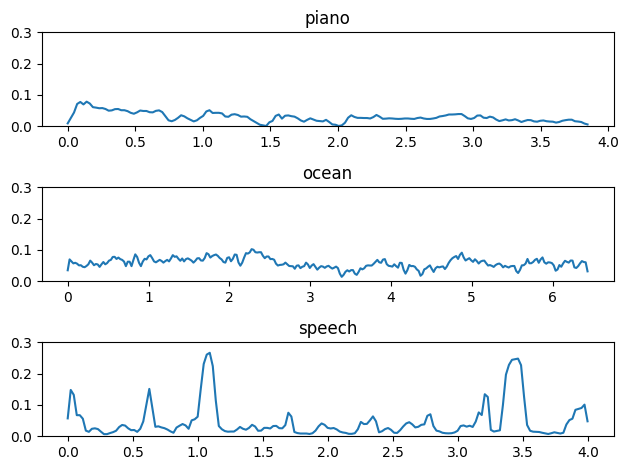

In [49]:
from scipy.io.wavfile import read
(fs, piano) = read('../audio/piano.wav')
(fs2, ocean) = read('../audio/ocean.wav')
(fs3, speech) = read('../audio/speech-female.wav')

#librosa's ZCR feature uses a default frame size of 2048 and hop of 512
a = zero_crossing_rate(piano.astype(float), hop_length=1024)
b = zero_crossing_rate(ocean.astype(float), hop_length=1024)
c = zero_crossing_rate(speech.astype(float), hop_length=1024)

ax1 = np.linspace(0,len(piano)/fs,len(a[0]))
ax2 = np.linspace(0,len(ocean)/fs,len(b[0]))
ax3 = np.linspace(0,len(speech)/fs,len(c[0]))

plt.subplot(3,1,1)
plt.plot(ax1, a[0])
plt.ylim(0,0.3)
plt.title('piano')
plt.subplot(3,1,2)
plt.plot(ax2,b[0])
plt.ylim(0,0.3)
plt.title('ocean')
plt.subplot(3,1,3)
plt.plot(ax3,c[0])
plt.ylim(0,0.3)
plt.title('speech')
plt.tight_layout()


In [50]:
#piano, ocean, speech - listen to all
Audio(piano, rate=44100)

## Features from Frequency domain

### Bandwidth
Is a measure of what range of frequencies are present in a signal. This is sometimes used to discrimitate between speech and music. (Music typically will have a larger bandwidth than speech).

`librosa.feature.spectral_bandwidth` is a function for calculating bandwidth. We can also calculate it manually if we have the complete spectrum of the signal. **The bandwidth is simply the difference between the highest and lowest frequency.** Note that we have more sensitive measures, so we typically don't use this one as a feature so often.

### Spectral Rolloff
The spectral rolloff point is a more conservative measure of bandwidth. It measures the frequency bin below which most (typically 85-95%) of the spectral energy exists. It is sometimes used to discriminate between different types of music tracks. The result of spectral rolloff is thus a bin index (which can be converted to Hz).

`librosa` also has a function for calculating this feature.

The formula for calculating can be defined as follows:
$$ \sum_{n=0}^{R_n -1} = \sum_{n=0}^{N-1} .85 * {|X[k]|_n}$$

Where $R_n$ is the frequency below which 85% of the spectrum is concentrated.

see [Music Data Mining, p.52](https://ebookcentral-proquest-com.prx.library.gatech.edu/lib/gatech/reader.action?docID=1633711&ppg=68)

### Spectral Centroid
Spectral centroid describes the "gravitational center" of spectral energy and is closely related to the brightness of a single tone. Perceptually, "nasality" is strongly correlated with spectral centroid. This feature has one of the highest impact on perceptual discrimination of timbre.

In general, high centroid values correspond to spectra with more high-frequency energy and to 'nasal' sounds, while low centroid values correspond to spectra with more low-frequency energy and to 'acute' or 'dull'  sounds.  Qualitatively, spectral centroid can be likened to a spectrum's "center of gravity" or "balance point" of the spectrum with amplitude values representing "weights" and frequency values representing the "position" of each weight along a balance scale.

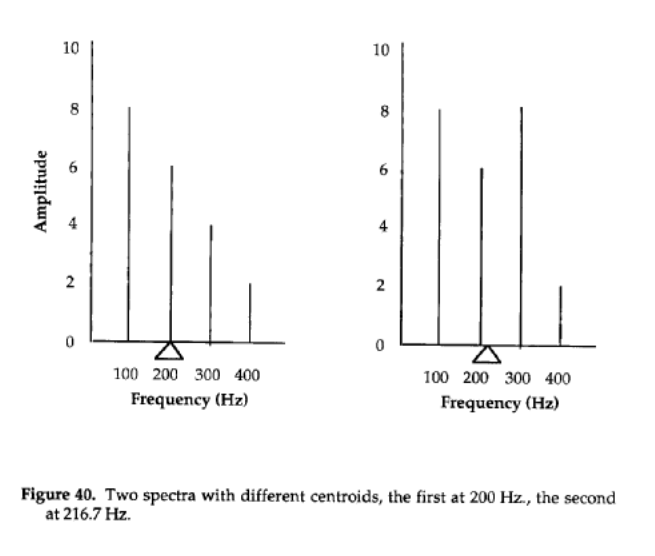

In [51]:
from IPython.display import Image
Image('../images/centroid.png', embed=True)

Calculating Centroid - Centroid is calculated by taking the sum of the frequencies weighted by (i.e. multiplied by) the magnitude spectrum, divided by the sums of the magnitudes. In other words, it is a weighted average. E.g.:

The calculation for the first spectrum in the example above is

$(8*100 + 6*200 + 4*300 + 2*400)/(8 + 6 + 4 + 2)$

...while the second is calculated as

$(8*100 + 6*200 + 8*300 + 2*400)/(8 + 6 + 8 + 2)$

This can be represented by the equation:
    $$C_n = \frac{\sum_{n=0}^{N-1}k(n)*x(n)}{\sum_{n=0}^{N-1}x(n)}$$
    
Where $k(n)$ is the center frequency of the $n$th bin, and $x(n)$ is the magnitude of the $n$th bin.

In [52]:
from librosa.feature import spectral_centroid
(fs, flute) = read('../audio/flute-A4.wav')
(fs2, oboe) = read('../audio/oboe-A4.wav')

In [53]:
from IPython.display import Audio
Audio('../audio/flute-A4.wav')

In [54]:
from IPython.display import Audio
Audio('../audio/oboe-A4.wav')

Text(0, 0.5, 'Hz')

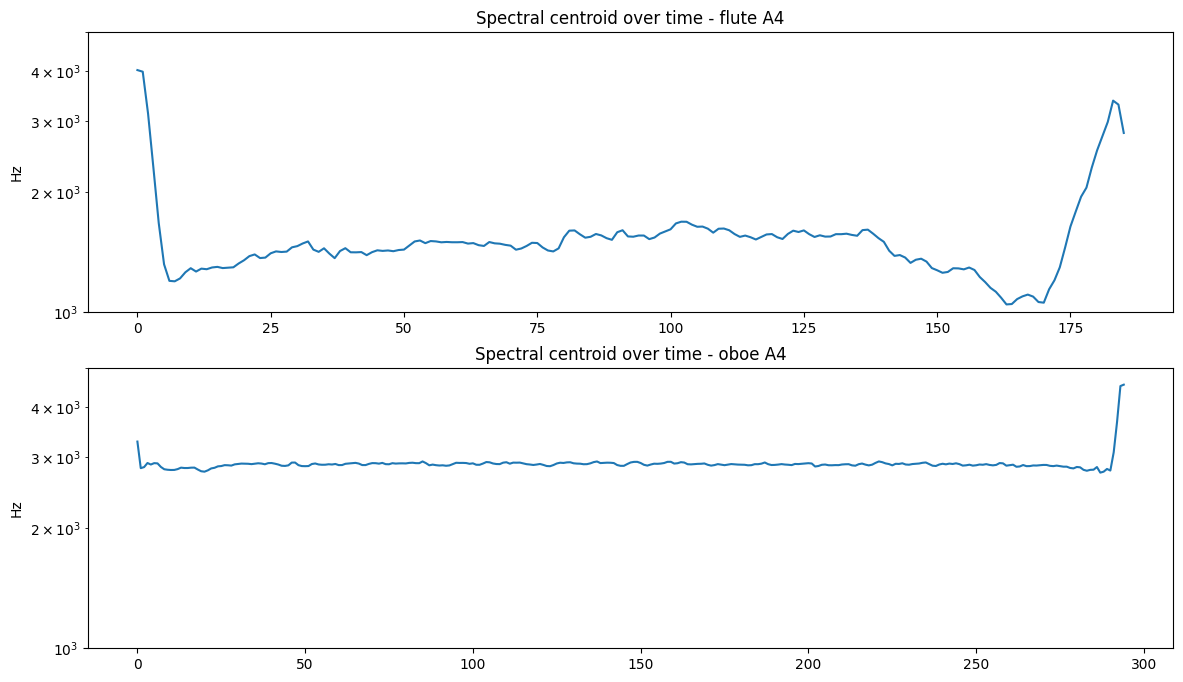

In [55]:
a = spectral_centroid(y=flute.astype(float), sr=fs)
b = spectral_centroid(y=oboe.astype(float), sr=fs2)

plt.figure(figsize = (14,8))
plt.subplot(2,1,1)
plt.semilogy(a[0])
plt.title('Spectral centroid over time - flute A4')
plt.ylim(1000, 5000)
plt.ylabel('Hz')
plt.subplot(2,1,2)
plt.semilogy(b[0])
plt.title('Spectral centroid over time - oboe A4')
plt.ylim(1000, 5000)
plt.ylabel('Hz')

### Spectral Envelope
The spectral envelope is the tracing of the peaks of the magnitude spectrum for a single window of time.

### Spectral Flux
Just like signal time-variance can be represented through a signal's envelope, spectral time-variance (spectral flux) is manifested as changes in the frequency and amplitude of a complex tone's components with time, and can be represented through time-variant spectra, or individual component amplitude/frequency envelopes. 

Spectral Flux measures change in the spectral "shape"; or how quickly the power spectrum of a signal is changing. It is calculated by comparing the current value of each magnitude spectrum bin in the current frame from the corresponding value of the magnitude spectrum in the previous frame. Each of these differences is then squared, and the result is the sum of the squares. Like energy and RMSE we commonly take the average by taking the square root and dividing by the total number of bins/2:

$$ SF = \frac{\sqrt{\sum(|X(k,n)| - |X(k,n -1)|^2)}}{k/2} $$

The spectral flux can be used to determine the timbre of an audio signal, or in onset detection, and like ZCR is also used in speech detection since spectral flux is higher for speech than music. 

### Spectral Spread
The Spectral Spread, sometimes also referred to as instantaneous bandwidth,
describes how the spectrum is concentrated around the Spectral Centroid.

It is a very technical description of spectral shape, but has been shown that spectral spread contributes to the perception of "roughness".

**Possible role in genre classification:**

Excerpts of electronic and popular music are (usually) more widely spread around their centroid than classical and jazz music (for example). 

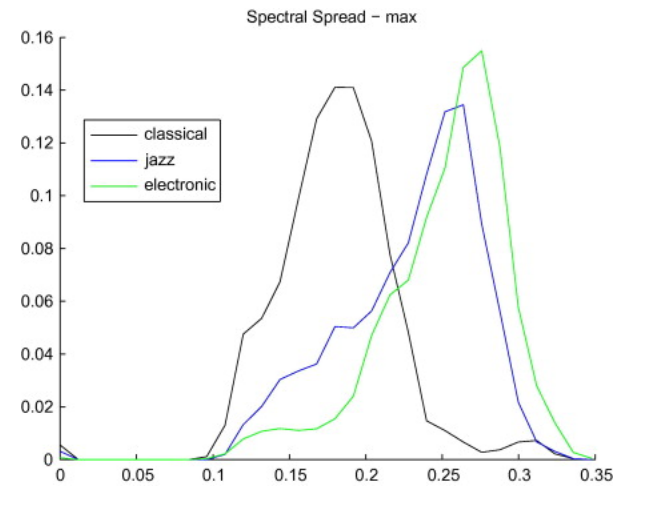

In [56]:
Image('../images/spectralSpread.png')

### Mel Frequency Cepstral Coefficients
The Mel Frequency Cepstral Coefficients (MFCCs) are a compact (but complicated) representation
of the shape of the spectral envelope of an audio signal based on the **mel frequecy scale**

A **mel** is a unit of pitch defined so that pairs of sounds which are
perceptually equidistant in pitch are separated by an equal number of mels. In other words, the mel
scale is a perceptually motivated scale of frequency intervals, which, if
judged by a human listener, are (supposedly) perceived to be equally spaced.

The MFCCs basically capture the shape of the spectrum, on a scale that emphasizes regions of the spectrum where more detail is needed, and discard some of the unimportant details.

#### History of the Mel
The scale was derived from experiments with human listeners. However, these experiments were done in the 1950s, and some modern audiologists think the scale is biased. According to this scale, in order to hear an octave doubling, you use the mel scale as the reference -- so 1000 mels doubled would equal 2000 mels, which should sound like an octave jump. This translates (if you look up the mel to Hz using the chart) to 1000Hz and 3500Hz!! (Use your sine tone generators to test this for yourself!)

Notice the scale appears roughly linear through ~700-1000Hz after which it becomes closer to logarithmic.

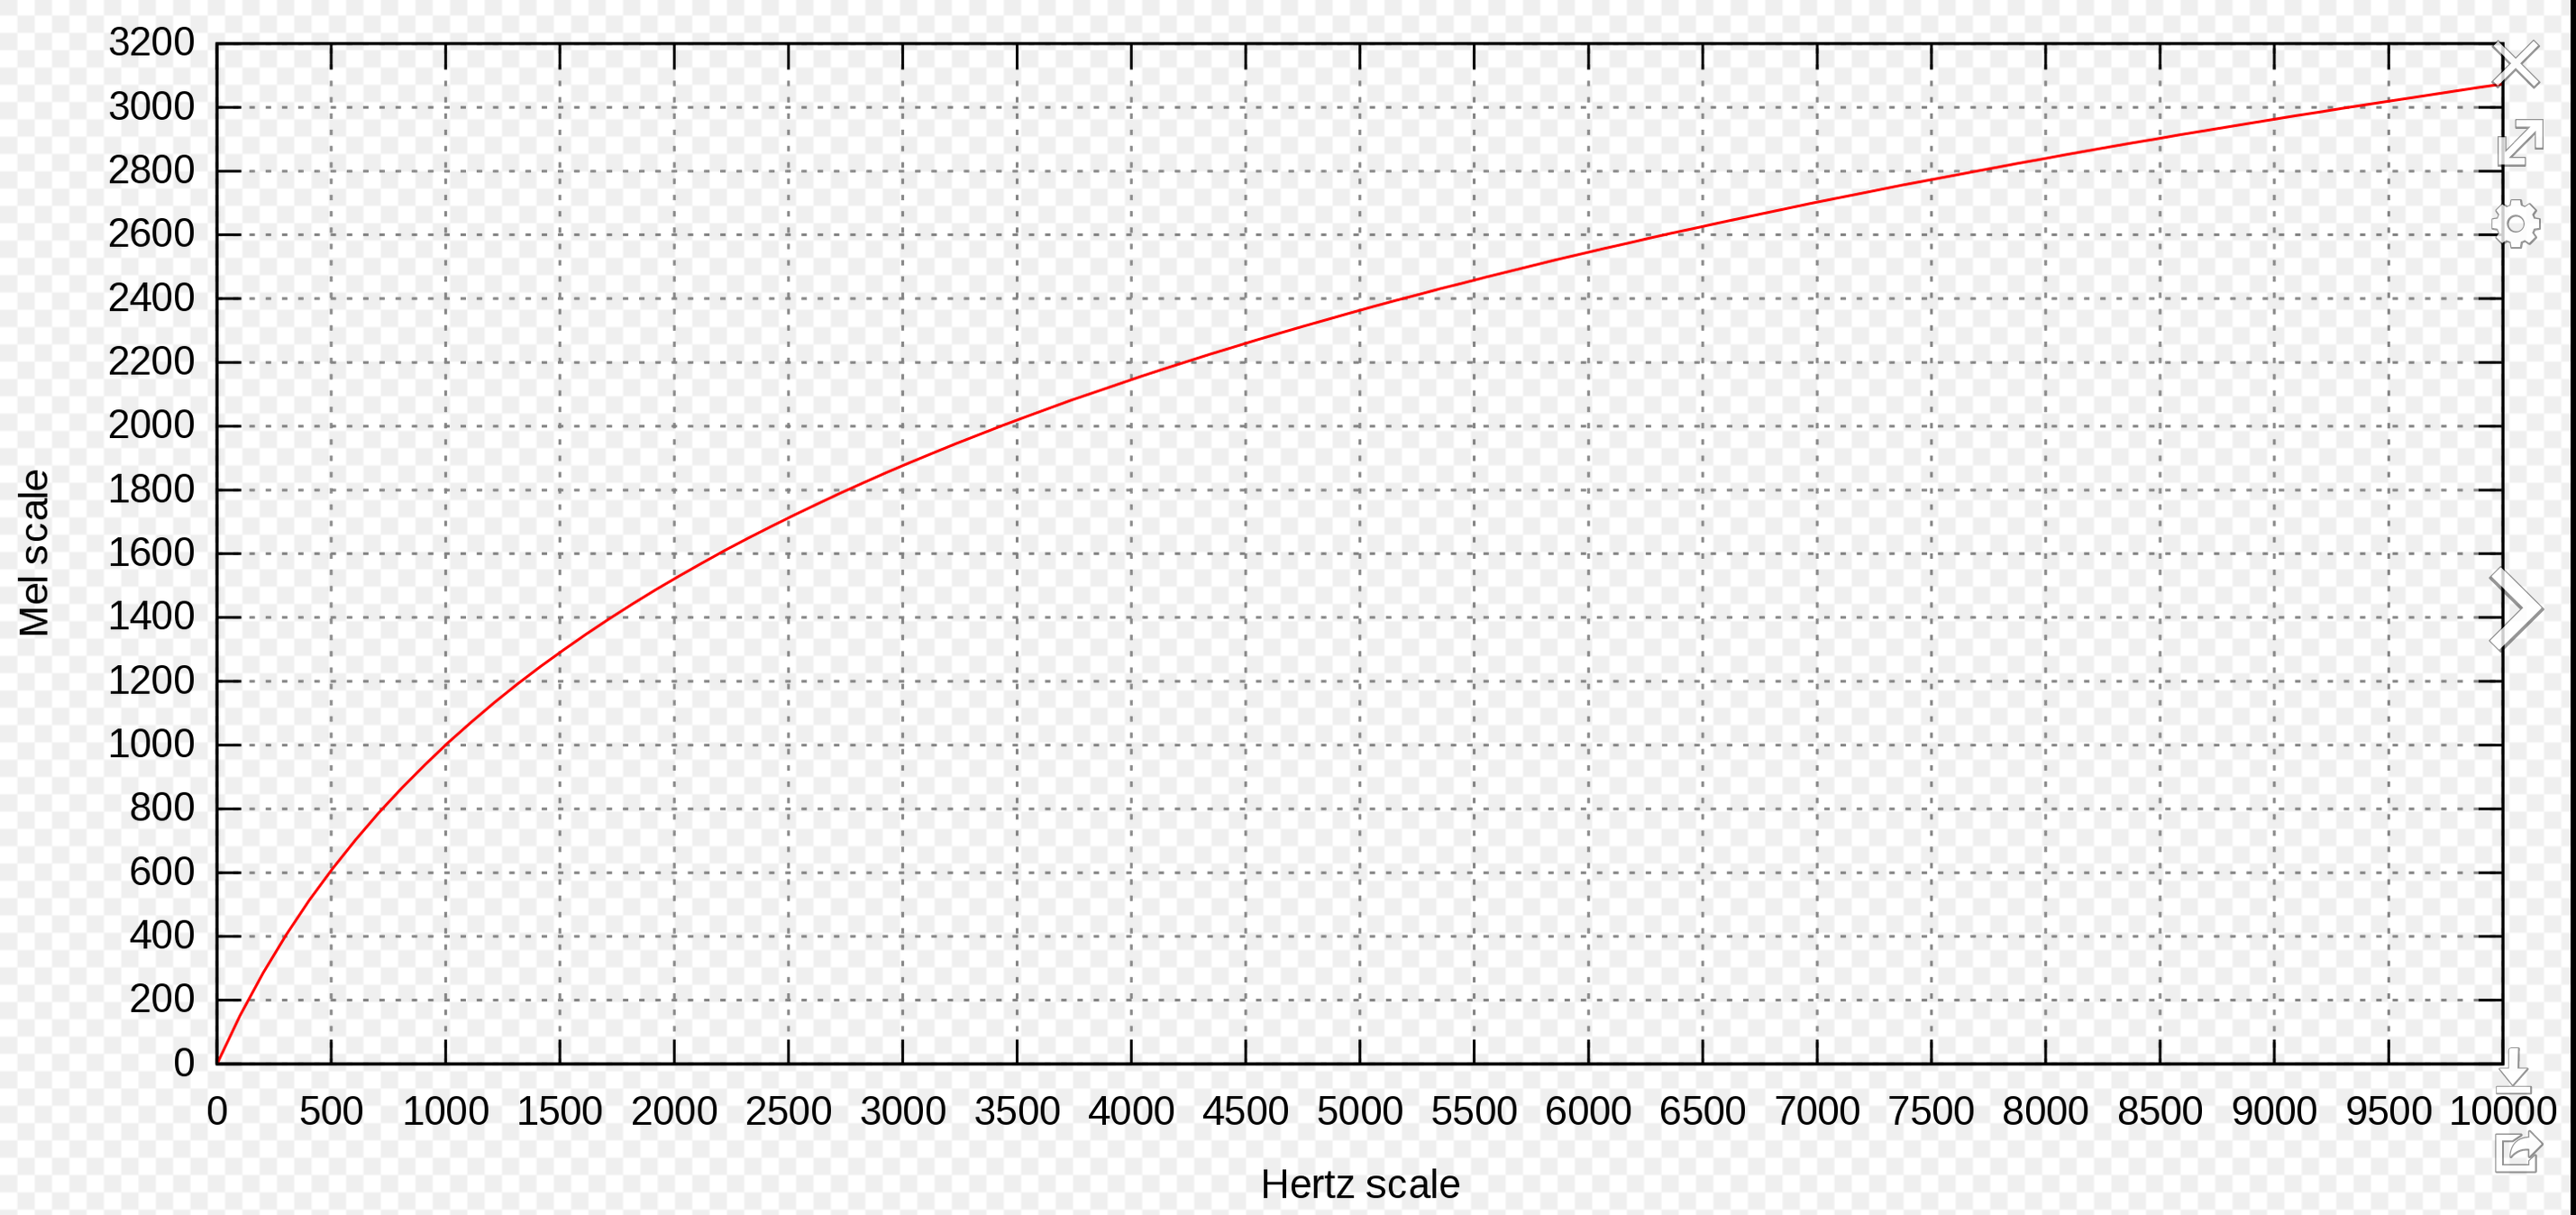

In [57]:
Image('../images/melScale.png') #download from Canvas if this isn't showing.

#### MFCCs
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of coefficients that concisely describe model the overall shape of a spectral envelope. In MIR, they are widely used in speech recognition systems. They have proven useful in a variety of tasks including speech/music discrimination and genre classification.

The mel scale gets segmented into $Q$ bands of constant (mel) width, and the mel frequencies within each band are then aggregated. On the linear Hz scale this yeilds $Q$ bands with non-uniform bandwidth which are supposed to relate closely to the critical bands (ask in MPC class!!). The bands are formed using half-overlapping triangular weighting functions with the typical number of total bands usually set to 40, where the first ~13 are roughly equally spaced (up through 1000Hz) after which the remaining 27 mel bands are arranged logarithmically.

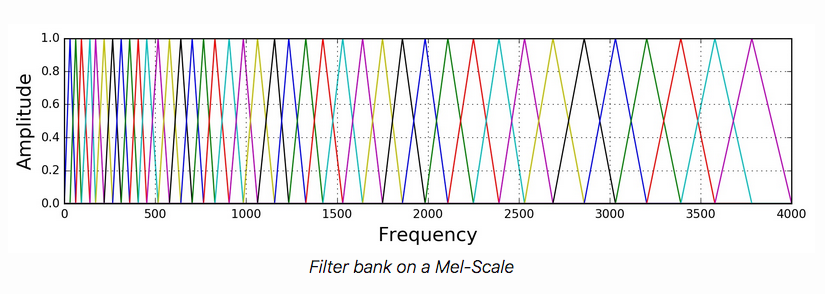

In [58]:
Image('../images/filterbanks.png')

#### Computing MFCCs

To actually compute the MFCCs (Mel Frequency Cepstrum Coefficients), we take the log of the power of each filterbank energy (to account for the non-linear relationship between the sound pressure level and the perceived mel spectrum loudness), and then perform a Discrete Cosine Transform (akin to a DFT) on those log filterbank energies as if it were a signal. 

In other words, we are taking a spectrum of a spectrum ("cepstrum"). The word 'cepstrum' is a play on words reversing 'spec'. The Mel cepstrum is because we first transform to the mel scale.

Thus, MFCCs are a "multidimensional" feature meaning the calculation will return multiple values (one per filterbank) for every analysis (STFT) window. The number of filterbanks can vary (some implementations seem to only use 26 and not 40). In addition, the actual total number of coefficients you retain is variable. For instance, you could choose to use only 20 coefficients instead of 40. It is common in speech recognition, for example, to only use the first 13 coefficients and discard the rest. (This reduces the dimensions of the data, while keeping the most valuable information.)

You should read about calculating MFCCs in the recommended reading on Canvas, and you should also look up the package documentation [here](https://librosa.org/doc/main/generated/librosa.feature.mfcc.html)

Note that despite their proven usefulness in many tasks such as speech detection, genre detection, etc., it remains difficult to relate particular 'MFCC profiles' (or weightings) to any particular audible feature of an input signal.

Since this feature does not give a single value per frame (like the others), but rather a vector of values per frame, we get a different output. To graph the output, then, we have to use either `plt.imshow` `librosa.display.specshow` -- I show both options below.

It is important to note, however, that the utility of plotting the output of MFCCs is fairly limited. 

In [59]:
mfcc_data= mfcc(y=newx,sr=fs,n_mfcc=20)
mfcc_data.shape

NameError: name 'newx' is not defined

Here we have 2277 frames with 20 MFCCs in each.  Note that the very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. For this reason it is commonly discarded when performing classification. Here, we will look at the entire output.

Text(0.5, 1.0, 'MFCCs')

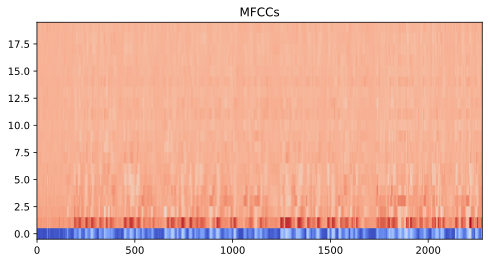

In [ ]:
plt.figure(figsize=(8,4))
plt.imshow(mfcc_data, aspect='auto', origin='lower', cmap='coolwarm')
plt.title('MFCCs')

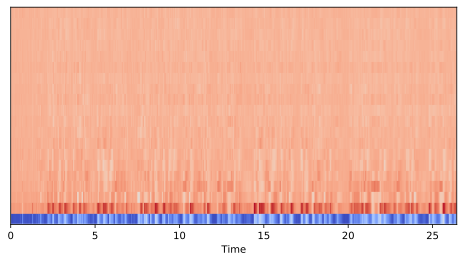

In [ ]:
from librosa import display
plt.figure(figsize=(8,4))
display.specshow(mfcc_data, sr=fs, x_axis='time')

### Related features
It is important to keep in mind that many of these extracted features will exhibit correlations with each other. For instance, higher spectral spread will be correlated with a higher spectral rolloff. This will be important to remember when we learn more about statistical modeling.